In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML_practise_project/income.csv")
df.head()

,Name,Age,Money
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


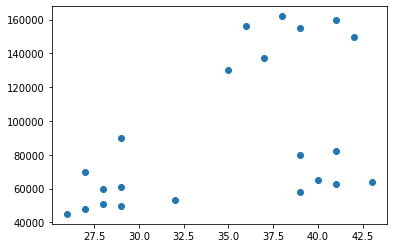

In [ ]:
plt.scatter(df["Age"],df["Money"])

In [ ]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [ ]:
y_predicted = km.fit_predict(df[['Age','Money']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [ ]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Money,cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


No handles with labels found to put in legend.


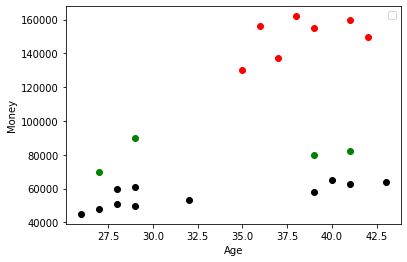

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age, df1["Money"], color='green')
plt.scatter(df2.Age, df2["Money"], color='red')
plt.scatter(df3.Age, df3["Money"], color='black')

plt.xlabel("Age")
plt.ylabel("Money")
plt.legend()

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df[['Money']])
df['Money'] = scaler.transform(df[['Money']])

scaler.fit(df[['Age']]) 
df.Age = scaler.transform(df[["Age"]])
df

,Name,Age,Money,cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Money']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [ ]:
df['clusters'] = y_predicted
df.drop('clusters',axis='columns', inplace=True)
df

,Name,Age,Money,cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [ ]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

No handles with labels found to put in legend.


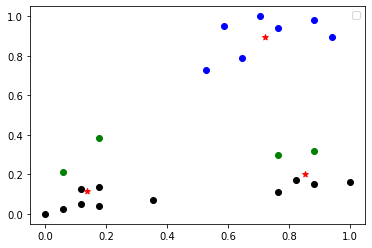

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Money'], color='green')
plt.scatter(df2.Age,df2['Money'], color='blue')
plt.scatter(df3.Age,df3['Money'], color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color="red", marker="*")

plt.legend()


In [ ]:
k_rng = range(1,10)
sse = []
for k in k_rng:
     km = KMeans(n_clusters=k)
     km.fit(df[['Age','Money']])
     sse.append(km.inertia_)

In [ ]:
sse

[5.434011511988178,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419566,
 0.26640301246684156,
 0.21055478995472496,
 0.1685851223602976,
 0.1407244898535231,
 0.10907864282306068]

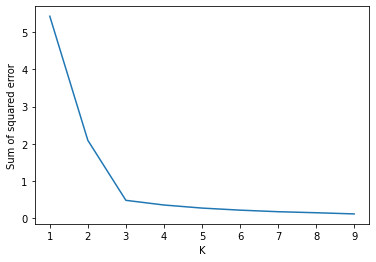

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

As this elbow tachnique or graph shows the point 3 that means we have 3 types of clusters